<br>
<h1 align="center">Heart Disease - Classification</h1>
<br>

## $\triangleright$ Our dataset :

$\bullet$ Αυτό το dataset περιέχει 76 χαρακτηριστικά,αλλά από αυτά θα χρησιμοποιήσουμε ένα subset των 14 χαρακτηριστικών.Γενικότερα η Cleveland βάση είναι από τις λίγες βάσεις πάνω στο ML.Το target field της αναφέρεται στην εμφάνιση καρδιακών προβλημάτων σε έναν ασθενή.Η βάση υπάρχει στο <a href="https://www.kaggle.com/ronitf/heart-disease-uci">Kaggle</a> και ονόμαζεται Heart Disease UCI.

$\bullet$ Tι χαρακτηριστικά θα χρησιμοποιήσουμε :

1. Ηλικία
2. Φύλο
3. Τύπους θωρακικού πόνου (4 τιμές)
4. Αρτηριακή πίεση
5. Όρια χοληστερίνης σε mg/dl
6. Ζάχαρο στο αίμα > 120 mg/dl
7. Αποτελέσματα ηλεκτρογραφημάτων ( 0,1,2)
8. Μέγιστοι χτύποι καρδίας
9. Άσκηση που προκαλείται από στηθάγχη.
10. oldpeak 
11. Την κλίση σε γράφημα ασκήσεων
12. Aριθμός αγγείων (0-3) χρωματισμένα με φλουροσόπη
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect



1. age 
2. sex 
3. chest pain type (4 values) 
4. resting blood pressure 
5. serum cholestoral in mg/dl 
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved 
9. exercise induced angina 
10. oldpeak = ST depression induced by exercise relative to rest 
11. the slope of the peak exercise ST segment 
12. number of major vessels (0-3) colored by flourosopy 
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

14. target


$\bullet$ Έχοντας όλα τα παραπάνω χαρακτηριστικά θα μελετήσουμε το συγκεκριμένο πρόβλημα classification με τις μεθόδους LinearClassifier και DNNClassifier που μας παρέχει η tensorflow.Η μία μέθοδος χρησιμοποιεί έναν γραμμικό classifier ενώ η άλλη αντίστοιχα ένα νευρωνικό δίκτυο που εκπαιδεύεται για να το classification του συγκεκριμένου προβλήματος.

## $\triangleright$ Libraries we use :

In [349]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from sklearn.model_selection import train_test_split
from feature_selector import FeatureSelector #Na perigrapsw pws to kanw egkatastash
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

## $\triangleright$ Read the dataset :

In [350]:
dataset = pd.read_csv('heart.csv')
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [351]:
dataset.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


## $\triangleright$ Correlation of the features

10 features with a correlation magnitude greater than 0.10.

4 features with a correlation magnitude greater than 0.30.



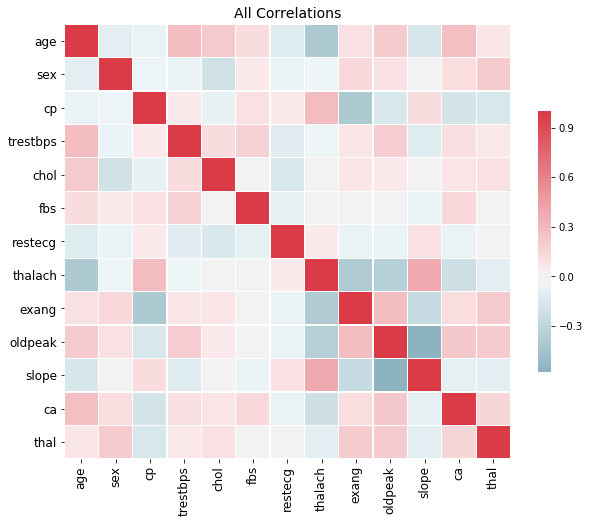

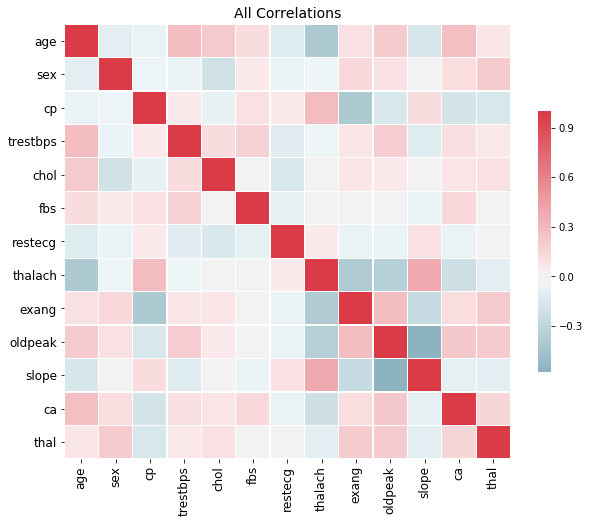

In [352]:
#Separate the data to features,target
columns=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']
features = pd.read_csv('heart.csv',usecols=columns)

target = pd.read_csv('heart.csv',usecols=["target"])

#Plot the cor
fs = FeatureSelector(data = features, labels = target)
fs.identify_collinear(correlation_threshold=0.10)
fs.plot_collinear(plot_all=True)

fs = FeatureSelector(data = features, labels = target)
fs.identify_collinear(correlation_threshold=0.30)
fs.plot_collinear(plot_all=True)

## $\triangleright$ Normalization:

In [353]:
#Turn to array
features = np.array(features)
target = np.array(target)

#Normalization
scaler = MinMaxScaler(feature_range=(0, 1))
features = scaler.fit_transform(features)
print(features)

[[0.70833333 1.         1.         ... 0.         0.         0.33333333]
 [0.16666667 1.         0.66666667 ... 0.         0.         0.66666667]
 [0.25       0.         0.33333333 ... 1.         0.         0.66666667]
 ...
 [0.8125     1.         0.         ... 0.5        0.5        1.        ]
 [0.58333333 1.         0.         ... 0.5        0.25       1.        ]
 [0.58333333 0.         0.33333333 ... 0.5        0.25       0.66666667]]


## $\triangleright$ Train-Test split

In [354]:
#Split the data in order to train and test the model
trainX,testX,trainY,testY = train_test_split(features,target,test_size=0.3)

#Turn to array
trainX = np.array(trainX)
testX = np.array(testX)
trainY = np.array(trainY)
testY = np.array(testY)

## $\triangleright$ Decision Tree Classifier

In [355]:
#Initialize and train the classifier
clf = DecisionTreeClassifier()
clf = clf.fit(trainX, trainY)

#Test the classifier in order to get some metrics
yPred = clf.predict(testX)
accuracy = accuracy_score(testY,yPred)
print("Accuracy: ",accuracy)
print("Confusion Matrix: ")
print(confusion_matrix(testY,yPred))

Accuracy:  0.7472527472527473
Confusion Matrix: 
[[25 12]
 [11 43]]


## $\triangleright$ Random Forest Classifier

In [356]:
#Initialize and train the classifier
clf = RandomForestClassifier(n_estimators=len(features), max_depth=None)
clf.fit(trainX,trainY.flatten())

#Test the classifier in order to get some metrics
yPred = clf.predict(testX)
accuracy = accuracy_score(testY,yPred)
print("Accuracy: ",accuracy)
print("Confusion Matrix: ")
print(confusion_matrix(testY,yPred))

Accuracy:  0.8131868131868132
Confusion Matrix: 
[[29  8]
 [ 9 45]]


## $\triangleright$ KNeighbors Classifier

In [357]:
neigh = KNeighborsClassifier(algorithm='brute',n_neighbors=(len(trainX)//2))
neigh.fit(trainX,trainY.flatten())

#Test the classifier in order to get some metrics
yPred = neigh.predict(testX)
accuracy = accuracy_score(testY,yPred)
print("Accuracy: ",accuracy)
print("Confusion Matrix: ")
print(confusion_matrix(testY,yPred))

Accuracy:  0.8021978021978022
Confusion Matrix: 
[[25 12]
 [ 6 48]]


## $\triangleright$ Turn data to dictionary

In [358]:
#Transofrm the data to dictionary format in order to use as a tensor
trainX={'age':trainX[:,0],'sex':trainX[:,1],'cp':trainX[:,2],'trestbps':trainX[:,3],'chol':trainX[:,4],'fbs':trainX[:,5],'restecg':trainX[:,6],'thalach':trainX[:,7],'exang':trainX[:,8],'oldpeak':trainX[:,9],'slope':trainX[:,10],'ca':trainX[:,11],'thal':trainX[:,12]}
testX={'age':testX[:,0],'sex':testX[:,1],'cp':testX[:,2],'trestbps':testX[:,3],'chol':testX[:,4],'fbs':testX[:,5],'restecg':testX[:,6],'thalach':testX[:,7],'exang':testX[:,8],'oldpeak':testX[:,9],'slope':testX[:,10],'ca':testX[:,11],'thal':testX[:,12]}

## $\triangleright$ Create the feature columns to be accessed in the model

In [359]:
#Create the feature columns
feature_columns = [tf.feature_column.numeric_column(k) for k in columns]

## $\triangleright$ Preparing the inputs for train,test

In [360]:
train_input_fn = tf.estimator.inputs.numpy_input_fn(
 x=trainX,
 y=trainY,
 num_epochs=None,
 batch_size=1,
 shuffle=True
)

evaluateInputFunction = tf.estimator.inputs.numpy_input_fn(
    x=testX,
    y=testY,
    num_epochs=1,
    shuffle=False
)

## $\triangleright$ Linear Classifier

In [361]:
#Create the model
linearClassifier =tf.estimator.LinearClassifier(feature_columns=feature_columns,n_classes=len(columns))

#Train the model
linearClassifier.train(input_fn=train_input_fn,steps=10000)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpwo0fmhb9', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f3c4d19a4e0>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmpwo0fmhb9/model.ckpt.
INFO:tensorflow:loss = 2.5649493, step = 1
INFO:tensorflow:global_step/sec: 642.32
INFO:tensorflow:loss = 0.13566996, step = 101 (0.158 sec)
INFO:tensorflow:global_step/sec: 897.235
INFO:tensorflow:loss = 0.035777286, step = 201 (0.113 sec)
INFO:tensorflow:global_step/sec: 882.647
INFO:tensorflow:loss

INFO:tensorflow:global_step/sec: 788.031
INFO:tensorflow:loss = 0.296965, step = 7501 (0.129 sec)
INFO:tensorflow:global_step/sec: 861.953
INFO:tensorflow:loss = 0.9838354, step = 7601 (0.114 sec)
INFO:tensorflow:global_step/sec: 800.05
INFO:tensorflow:loss = 0.51594, step = 7701 (0.125 sec)
INFO:tensorflow:global_step/sec: 819.991
INFO:tensorflow:loss = 0.005353638, step = 7801 (0.121 sec)
INFO:tensorflow:global_step/sec: 838.502
INFO:tensorflow:loss = 0.24079321, step = 7901 (0.119 sec)
INFO:tensorflow:global_step/sec: 877.552
INFO:tensorflow:loss = 0.3061378, step = 8001 (0.114 sec)
INFO:tensorflow:global_step/sec: 313.409
INFO:tensorflow:loss = 0.1345845, step = 8101 (0.318 sec)
INFO:tensorflow:global_step/sec: 765.758
INFO:tensorflow:loss = 0.0350852, step = 8201 (0.133 sec)
INFO:tensorflow:global_step/sec: 609.101
INFO:tensorflow:loss = 0.023463571, step = 8301 (0.162 sec)
INFO:tensorflow:global_step/sec: 839.971
INFO:tensorflow:loss = 0.012320366, step = 8401 (0.126 sec)
INFO:te

## $\triangleright$ Evaluate Linear Classifier

In [362]:
linearClassifier.evaluate(evaluateInputFunction)

INFO:tensorflow:Starting evaluation at 2019-04-03-16:58:48
INFO:tensorflow:Restoring parameters from /tmp/tmpwo0fmhb9/model.ckpt-10000
INFO:tensorflow:Finished evaluation at 2019-04-03-16:58:48
INFO:tensorflow:Saving dict for global step 10000: accuracy = 0.82417583, average_loss = 0.3797314, global_step = 10000, loss = 34.555557


{'accuracy': 0.82417583,
 'average_loss': 0.3797314,
 'loss': 34.555557,
 'global_step': 10000}

## $\triangleright$ Deep Neural Network Classifier

In [363]:
#Create the model
dnnClassifierModel = tf.estimator.DNNClassifier(
 feature_columns=feature_columns,
 hidden_units=[256, 32],
 optimizer=tf.train.AdamOptimizer(1e-4),
 n_classes=len(columns),
)

#Train the model
dnnClassifierModel.train(input_fn=train_input_fn, steps=10000)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpnndu0ngu', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f3c31320438>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmpnndu0ngu/model.ckpt.
INFO:tensorflow:loss = 2.8837109, step = 1
INFO:tensorflow:global_step/sec: 700.626
INFO:tensorflow:loss = 2.2735758, step = 101 (0.146 sec)
INFO:tensorflow:global_step/sec: 856.531
INFO:tensorflow:loss = 2.0172217, step = 201 (0.115 sec)
INFO:tensorflow:global_step/sec: 933.079
INFO:tensorflow:loss =

INFO:tensorflow:loss = 0.7892659, step = 7501 (0.122 sec)
INFO:tensorflow:global_step/sec: 875.789
INFO:tensorflow:loss = 0.6783413, step = 7601 (0.114 sec)
INFO:tensorflow:global_step/sec: 893.544
INFO:tensorflow:loss = 1.8669571, step = 7701 (0.112 sec)
INFO:tensorflow:global_step/sec: 835.153
INFO:tensorflow:loss = 0.79098177, step = 7801 (0.120 sec)
INFO:tensorflow:global_step/sec: 886.831
INFO:tensorflow:loss = 1.56823, step = 7901 (0.113 sec)
INFO:tensorflow:global_step/sec: 981.183
INFO:tensorflow:loss = 0.18037938, step = 8001 (0.102 sec)
INFO:tensorflow:global_step/sec: 870.049
INFO:tensorflow:loss = 0.42772064, step = 8101 (0.115 sec)
INFO:tensorflow:global_step/sec: 1093.96
INFO:tensorflow:loss = 0.2665862, step = 8201 (0.093 sec)
INFO:tensorflow:global_step/sec: 795.501
INFO:tensorflow:loss = 0.3705255, step = 8301 (0.124 sec)
INFO:tensorflow:global_step/sec: 840.752
INFO:tensorflow:loss = 0.026458003, step = 8401 (0.119 sec)
INFO:tensorflow:global_step/sec: 807.75
INFO:ten

## $\triangleright$ Evaluate Deep Neural Network Classifier

In [364]:
dnnClassifierModel.evaluate(evaluateInputFunction)

INFO:tensorflow:Starting evaluation at 2019-04-03-16:59:02
INFO:tensorflow:Restoring parameters from /tmp/tmpnndu0ngu/model.ckpt-10000
INFO:tensorflow:Finished evaluation at 2019-04-03-16:59:02
INFO:tensorflow:Saving dict for global step 10000: accuracy = 0.83516484, average_loss = 0.3932827, global_step = 10000, loss = 35.788727


{'accuracy': 0.83516484,
 'average_loss': 0.3932827,
 'loss': 35.788727,
 'global_step': 10000}